# <center>Network Science</center>

## <center>Home Assignment #3: Centralities and Assortativity</center>

### <center>Student: *{German Sokolov}*</center>

#### <hr /> General Information

**Due Date:** 13.03.2016 23:59 <br \>
**Late submission policy:** -0.2 points per day <br \>


Please send your reports to <mailto:network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

### Task 1

Compute degree centrality, Pagerank and  HubAuthorities scores for the [flickr](https://snap.stanford.edu/data/web-flickr.html) network. 

Data contains sparse matrix A and list of user names.
This is a “denser” part of the Flickr photo sharing site friendship graph from 2006. Edge direction corresponds to friendship requests (following). Some of the links are reciprocal,others not.  

Provide top 50 names in each ranking, compare results

You can load .mat files with the following commands:

In [1]:
import scipy.io
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
import os
import operator
%matplotlib inline

**Directed graph** should be created from A matrix - this can be explicitly specified while creating the graph:

In [2]:
os.chdir('/Users/imac/Dropbox/Study/Social networks analysis/Data')
data = scipy.io.loadmat('flickr.mat')
G = nx.from_scipy_sparse_matrix(data['A'], create_using=nx.DiGraph())

As we have **directed graph**, two measures of degree centrality are available: in-degree and out-degree:

In [3]:
in_degree_centr = nx.in_degree_centrality(G)
out_degree_centr = nx.out_degree_centrality(G)
in_centr_top50 = sorted(in_degree_centr.items(), key = operator.itemgetter(1), reverse=True)[:50]
out_centr_top50 = sorted(out_degree_centr.items(), key = operator.itemgetter(1), reverse=True)[:50]

**In-degree centrality** measure is more interesting measure than out-degree in our case. It indeed reflects the popularity of some nodes in terms of incoming friendship requests - let's take 50 most popular nodes upon this centrality measure:

In [4]:
in_centr_top50_nodes = [node for (node,value) in in_centr_top50]

Now let's apply **Pagerank** algorithm with $\alpha$ = 0.85: 

In [5]:
pagerank = nx.pagerank(G, max_iter=500)
pagerank_top50 = sorted(pagerank.items(), key = operator.itemgetter(1), reverse=True)[:50]
pagerank_top50_nodes = [node for (node,value) in pagerank_top50]

Finally, we need to use **HITS** algorithm. It returns two values - authority and hub estimates. The former value is more applicable because its calculation is based on incoming edges, which makes it comparable with the first two metrics - ***in-degree centrality and Pagerank***.

In [6]:
hits_author = nx.hits(G, max_iter=500)[1]
hits_author_top50 = sorted(hits_author.items(), key = operator.itemgetter(1), reverse=True)[:50]
hits_author_top50_nodes = [node for (node,value) in hits_author_top50]

It is time to compare results of all three metrics. Firstly, let's take a look at the **first 5 nodes**:

In [7]:
print('',in_centr_top50_nodes[:5],'\n',pagerank_top50_nodes[:5], '\n', hits_author_top50_nodes[:5])

 [1464, 3746, 5628, 10845, 2128] 
 [1464, 3746, 10845, 4012, 5628] 
 [1464, 3746, 2128, 5628, 10845]


The first and second most popular nodes are identical in all metrics. Other nodes' positions are slightly different, but in general the order is almost the same:

In [8]:
print('',in_centr_top50_nodes,'\n\n',pagerank_top50_nodes, '\n\n', hits_author_top50_nodes)

 [1464, 3746, 5628, 10845, 2128, 4012, 8234, 7533, 12812, 880, 4300, 4964, 8602, 12674, 3097, 7379, 1043, 2925, 22, 6147, 6136, 9463, 170, 8054, 3784, 5554, 6127, 119, 117, 2473, 6031, 10525, 134, 3808, 8690, 1208, 9177, 269, 6935, 6777, 6998, 7535, 12189, 8233, 7888, 9729, 973, 59, 1296, 3953] 

 [1464, 3746, 10845, 4012, 5628, 12812, 2128, 8234, 7533, 4964, 4300, 880, 22, 12674, 170, 3097, 1043, 7379, 2925, 6147, 6136, 119, 134, 9463, 8602, 6031, 8054, 6127, 59, 117, 269, 5554, 6998, 3784, 7535, 6935, 5175, 600, 973, 4, 91, 5784, 7888, 8690, 3808, 9177, 3493, 10525, 189, 1208] 

 [1464, 3746, 2128, 5628, 10845, 4012, 8234, 7533, 4964, 4300, 12674, 7379, 8602, 3097, 880, 1043, 2925, 9463, 6136, 3784, 8054, 12189, 6127, 10525, 2473, 6935, 170, 5554, 10606, 11006, 8690, 7888, 8233, 6517, 1287, 9084, 13930, 6902, 7448, 3808, 13496, 1208, 3652, 119, 6031, 3711, 12783, 3449, 1296, 6777]


Let's visualize top-50 nodes. The base colorscheme is assigned to In-degree centrality measure.

If the node is in top-50 list of centrality measure but not in other metrics its color is white.  

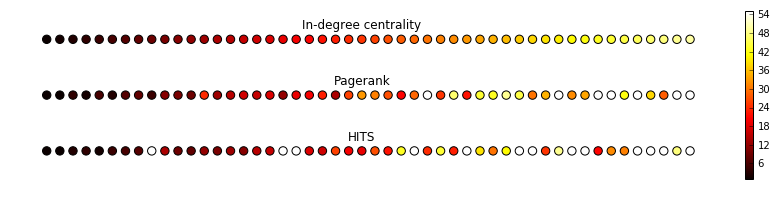

In [9]:
plt.figure(figsize=(15,3))
cm = plt.cm.get_cmap('hot')
x = range(1, 51)
y1 = np.ones(50)*1.2
y2 = np.ones(50)*1.1
y3 = np.ones(50)*1
color_centr = x
color_pagerank = [pagerank_top50_nodes.index(x) if x in pagerank_top50_nodes else 60 for x in in_centr_top50_nodes] 
color_hits = [hits_author_top50_nodes.index(x) if x in hits_author_top50_nodes else 60 for x in in_centr_top50_nodes]
sc_centr = plt.scatter(x, y1, c=color_centr, vmin=1, vmax=55, s=70, cmap=cm)
sc_pagerank = plt.scatter(x, y2, c=color_pagerank, vmin=1, vmax=55, s=70, cmap=cm)
sc_hits = plt.scatter(x, y3, c=color_hits, vmin=1, vmax=55, s=70, cmap=cm)
plt.xlim([0,51])
plt.ylim([0.95,1.25])
plt.text(25, 1.22, 'In-degree centrality', horizontalalignment='center', fontsize = 12)
plt.text(25, 1.12, 'Pagerank', horizontalalignment='center', fontsize = 12)
plt.text(25, 1.02, 'HITS', horizontalalignment='center', fontsize = 12)
plt.colorbar()
plt.axis('off')
plt.show()

Top-50 lists upon all measures are indeed very **similar** ! 

### <hr /> Task 2

Here are the [Facebook friendship graphs](https://snap.stanford.edu/data/egonets-Facebook.html) from several US universities from 2005 (one year after fb launch).

Data contains a A matrix (sparse) and a "local_info" variable, one row per node: 
a student/faculty status flag, gender, major, second major/minor (if applicable), dorm/house, year, and high school. 
Missing data is coded 0.

Compute node degree assortativity (mixining by node degree) and assortativity coefficient (modularity) for gender, major, dormitory, year, high school for all universities and compare the results.

In [10]:
os.chdir('/Users/imac/Dropbox/Study/Social networks analysis/Data/universities')
data_berkeley = scipy.io.loadmat('Berkeley13.mat')
data_caltech = scipy.io.loadmat('Caltech36.mat')
data_harvard = scipy.io.loadmat('Harvard1.mat')
data_oklahoma = scipy.io.loadmat('Oklahoma97.mat')
data_princeton = scipy.io.loadmat('Princeton12.mat')
data_texas = scipy.io.loadmat('Texas80.mat')

Firstly, let's compute node **degree assortativity coefficient** for each network. 

In [11]:
names_univ = ['Berkeley', 'Caltech', 'Harvard', 'Oklahoma', 'Princeton', "Texas"]
degree_assort = []
datasets = [data_berkeley, data_caltech, data_harvard, data_oklahoma, data_princeton, data_texas]

for d in datasets:
    G = nx.from_scipy_sparse_matrix(d['A'])
    ass_coeff = nx.degree_assortativity_coefficient(G)
    degree_assort.append(ass_coeff)

...And plot it:

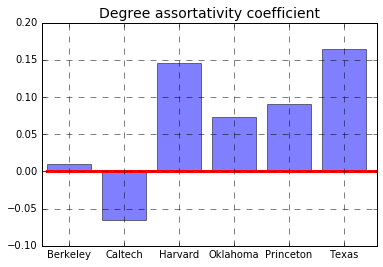

In [31]:
plt.figure()
plt.bar([0, 1, 2, 3, 4, 5], degree_assort, facecolor = 'blue', alpha = 0.5)
plt.xlim([-0.1, 6])
plt.xticks([0.4, 1.4, 2.4, 3.4, 4.4, 5.4], names_univ)
plt.title("Degree assortativity coefficient", fontsize = 14)
plt.grid(b=True, which='major', color='k', linestyle='--')    
plt.plot([0,6], [0,0], 'r', lw = 3)

The last 4 Facebook networks are definitely **assortative**. Berkley's degree assortativity is somewhat low, because the its nodes' connections are not far from random distribution. 

The interesting fact, that Caltech network seems to be **disassortative** - i.e. low-degree nodes tend to connect with high-degree nodes and vice versa.

Now, it is time to compute assortativity coefficients with respect to **nodes' attributes** (it can take up to  several mins to process data):

Missing entries (zeros) are ommitted, otherwise they would be counted as the same attributes for the nodes, which is completely wrong.  

In [13]:
names_univ = ['Berkeley', 'Caltech', 'Harvard', 'Oklahoma', 'Princeton', "Texas"]
labels_attrib = ['status', 'gender', 'major', 'minor', 'dorm', 'year', 'school']

attrib_assort = []
datasets = [data_berkeley, data_caltech, data_harvard, data_oklahoma, data_princeton, data_texas]

for d in datasets:
    G = nx.from_scipy_sparse_matrix(d['A'])
    for i in range(len(labels_attrib)):
        nx.set_node_attributes(G, name = labels_attrib[i], 
                               values = dict(zip(G.nodes(), d['local_info'][:,i])))
    for l in labels_attrib:
        attrib_assort.append(nx.attribute_assortativity_coefficient(G, attribute = l, 
                             nodes = list(np.ix_(d['local_info'][:,labels_attrib.index(l)] != 0)[0])))
        
attrib_assort = np.array(attrib_assort).reshape(6, 7)

Fianally, plot the coefficients for each attribute and university separately:

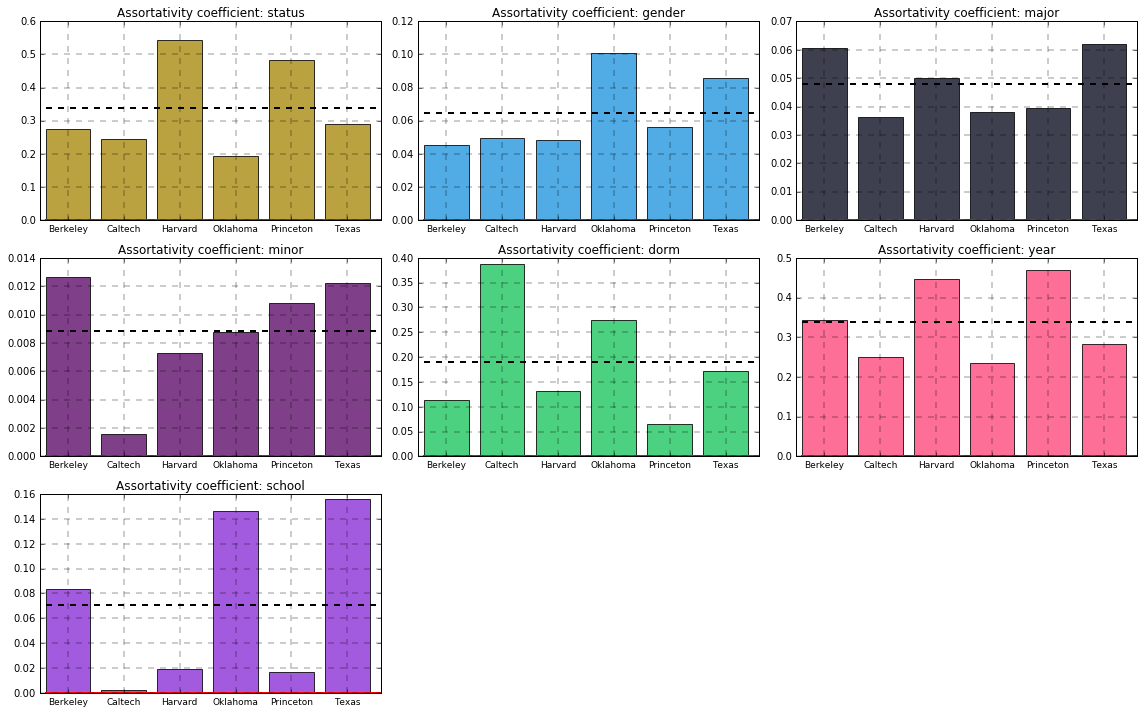

In [52]:
plt.figure(figsize = (16, 10))

for i in range(attrib_assort.shape[1]):
    plt.subplot(3, 3, i+1)
    plt.bar([0, 1, 2, 3, 4, 5], attrib_assort[:, i], alpha = 0.8, 
            color = (np.random.rand(), np.random.rand(), np.random.rand()))
    plt.xlim([-0.1, 6])
    plt.xticks([0.4, 1.4, 2.4, 3.4, 4.4, 5.4], names_univ, fontsize = 9)
    plt.title("Assortativity coefficient: " + labels_attrib[i], fontsize = 12)
    plt.grid(b=True, which='major', color='k', linestyle = '--', lw = 0.4)    
    plt.plot([0,6], [0,0], 'r', lw = 3)
    plt.plot([0,6], [attrib_assort[:, i].mean(), attrib_assort[:, i].mean()], 'k--', lw = 2)
    plt.tight_layout()

Few interesting inferences are to be made:
* There are high coefficients on attributes **status/faculty**, **year** and **dorm/house** - it means that students living at the same place, studying at the same faculty and having the same age, tend to communicate with each other more than with other students
* There are slight positive coefficients on attributes **gender**, **major**, **school** and **minor** - but one cannot say that there is strong evidence of assortativity mixing
* Caltech has outstanding dorm coefficient - probably significant part of students live at the same place or students living at the same dorm usually study at the same campus
* Caltech, Harvard, Princeton all have small school coefficient - students entering the univeristy might be from different part of the US, and they have never seen each other before   